<a href="https://colab.research.google.com/github/KARTIKPARATKAR/DEEP-LEARNING-WORK/blob/main/Dropout_Layers_In_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dropout Layers:**

We use dropout layers in neural network when our model starts overfitting.Neural networks are prone to overfitting because ANN is very complex.If we train the model with different and more data then we can decrease the overfitting of the ANN.We can reduce complexity of the neural network,which means if you are using 28 hidden layer then go with 14 hidden layer, if you have defined 128 nodes then go with 64 nodes. Use early stoping while training which stops the training of the model when it come across overfitting.We can use L1 and L2 regularization which is optimization algorithm.And finally you can use Dropouts.

**Understanding Dropouts:**

The concept of dropout is that when you have fully connected deep neural network, there is high possibility of overfitting of the model. To overcome this issue, we randomly drop the nodes of input layer and hidden layer. Dropping the node means , for every epoch we will randomly switch off some of the nodes in input layer and hidden layer.Turning off the node means that perticular node will not be connected to any other node and its weight and bias value will be 0.

Lets consider we are training the model with 10 epochs. If we use dropouts,for every epochs we select random nodes of input layer and hidden layer and switch it off.For every epoch we will get the different neural network and as a result we are training the model on 10 different neural networks.For 1st epoch we will have different architecture of neural network,for 2nd epoch we will have some other architecture. We are training the same data but on a different neural network , more precisely on no of epochs types of neural network.

Below is the type of neural network when we use dropouts , the architecture of neual network changes. If we have 10 epochs then we will get 10 different neural network to train our data.

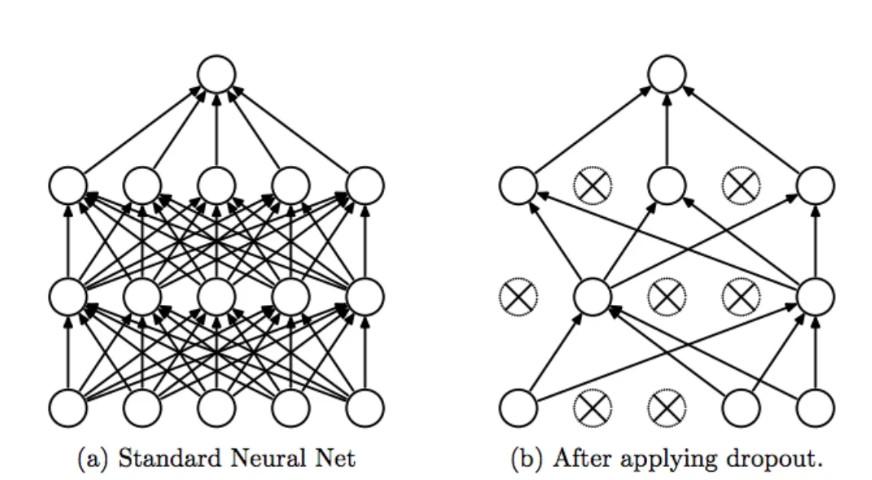

**Why does Dropout Layers / Dropping a node works in reducing Overfitting?**

Consider a classification problem of red and blue. We have trained two different deep neural network as black and green. Black model is not having any kind of overfitting as it tries to extract the pattern of blue and red datapoints and not exactly each and every datapoint.But in case of green model,it tries to exactly differentiate the blue and red datapoints which will lead to overfitting of the model. To overcome the issue of overfitting in green model we can use dropout layers so that model will not give more importance to the perticular feature and it will try to extract those features only which are more relevent and which helps in extracting the pattern in the classification data.

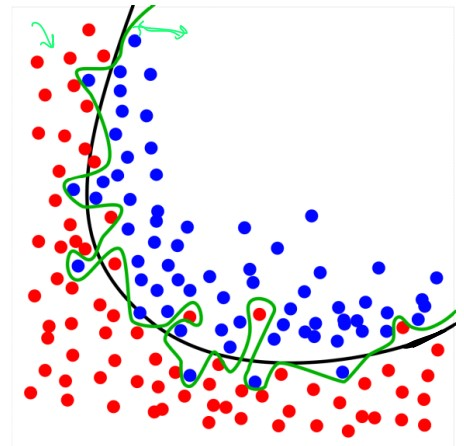

We will use dropout layers as follows which in every epoch, we get different neural network model that helps to not give more importance to perticular feature and as a result overfitting issue is resolved.

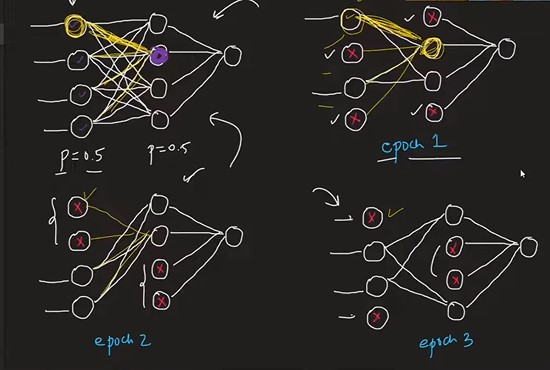

**How Dropout Layers is analogous to RandomForest From Machine Learning?**

Lets consider we have dataset having 10 input features and one output column as y. To create a random forest , we train multiple decision tress. Let we have trained 100 decision trees to make a random forest. We feed the data by column sampling or row sampling to train the each decision tree. Consider we are giving data by column samling.While trining the 1st decision tree,we will give 50% of columns only which means out of 10 input features, only 5 will be used to train the 1st decision tree.While training the 2nd decision tree,we will give another random 5 columns to train the 2nd decision tree.By doing this, we will have 100 decision trees which are kind of different from each other because these trees are trained from 5 random columns. So we have now ensemble of 100 decision trees which are trained from the given dataset. Now while prediction , we will send single row to every decision tree and get the output as yes or no from each 100 decision tree. Let we got 60 trees with yes and 40 trees with no. So by majority counts , we will give the output of our random forest as yes.


This same thing we do when we dropout the layer in neural network.Dropping a nodes of input and hidden layer means that training the neural network with different input columns. So if you are training the neural network on 100 epochs then you have 100 different kind of neural networks and for each neural network you have trained on different data. This is what happend with random forest training of 100 decision trees.

If we set dropout of p=0.25  , it means that out of total available nodes, p=0.25 % nodes will be randomly switched off in every epoch of training. If we have 4 nodes then in every epoch, 1 epoch will be dropped/switched off randomly in each epoch.

**NOTE-**

While training only we will have a dropout layers in input and output. When we test the model we will have fully connected neural network for testing. So what will be the weight value of those nodes that were not there while training.
There is formula to calculate the weight of that absent node as --> w(1-p) where p is the dropout. If we have dropout of p=0.25 and epochs are 100 then out of 100 epochs that perticular node will be present for 75 epochs and it will be absent for 25 epochs. So we will give the weight according to their availability in training.

**Folowing is Coding Implementation of Dropout Layers:**

In [ ]:
#IMporting dependencies
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Consider a regression problem and generate dataset for Regression problem as follows:

In [ ]:
x_train = np.linspace(-1,1,20)
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  ,
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475,
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])
x_test = np.linspace(-1,1,20)
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

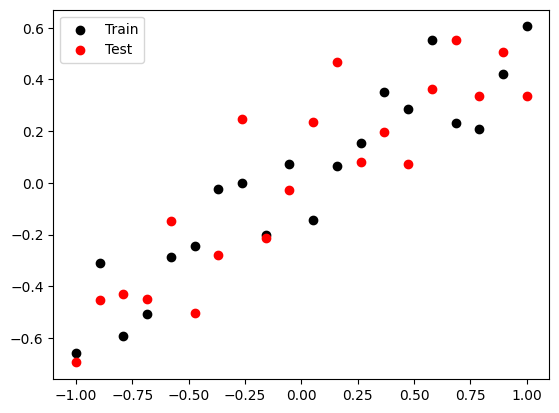

In [ ]:
#Plotting the dataset
plt.scatter(x_train, y_train, color='Black',label = 'Train')
plt.scatter(x_test,y_test,c='red',label='Test')
plt.legend()
plt.show()

In [ ]:
#Defining an ANN
model = Sequential()
model.add(Dense(128,input_dim=1,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(1,activation = "linear"))

adam = Adam(learning_rate = 0.01)  #Using adam optimizer with learning rate of 0.01
model.compile(loss="mse",optimizer=adam,metrics=["mse"])
history = model.fit(x_train,y_train,epochs=500,validation_data=(x_test,y_test))

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.1031 - mse: 0.1031 - val_loss: 0.0470 - val_mse: 0.0470
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 0.0398 - mse: 0.0398 - val_loss: 0.0395 - val_mse: 0.0395
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.0300 - mse: 0.0300 - val_loss: 0.0465 - val_mse: 0.0465
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 0.0353 - mse: 0.0353 - val_loss: 0.0324 - val_mse: 0.0324
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.0217 - mse: 0.0217 - val_loss: 0.0334 - val_mse: 0.0334
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 0.0232 - mse: 0.0232 - val_loss: 0.0366 - val_mse: 0.0366
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.0267 - mse: 0.0267 - val_loss: 0.0319 - val_mse: 0.0319
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 0.0217 - mse: 0.0217 - val_loss: 0.0279 - val_mse: 0.0279
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.0171 - mse

In [ ]:
#Evaluating a model
train_mse = model.evaluate(x_train,y_train,verbose=0)
test_mse = model.evaluate(x_test,y_test,verbose=0)
print("Train MSE:",train_mse[1])
print("Test MSE:",test_mse)

Train MSE: 0.004249990917742252
Test MSE: [0.04564366862177849, 0.04564366862177849]


Here it is observed that we got test error nearly 10 times than train error.

In [ ]:
y_pred = model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


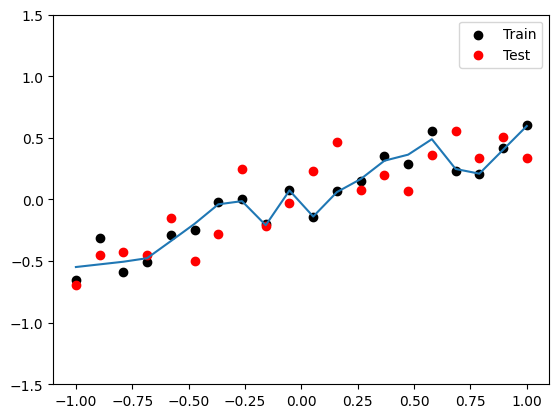

In [ ]:
plt.figure()
plt.scatter(x_train,y_train,c='black',label='Train')
plt.scatter(x_test,y_test,c='red',label='Test')
plt.plot(x_test,y_pred)
plt.legend()
plt.ylim((-1.5,1.5))
plt.show()
#This will draw the decision boundry that can work on the given data
#The curve is highly sensitive to black datapoints which suggests that there is overfitting in model

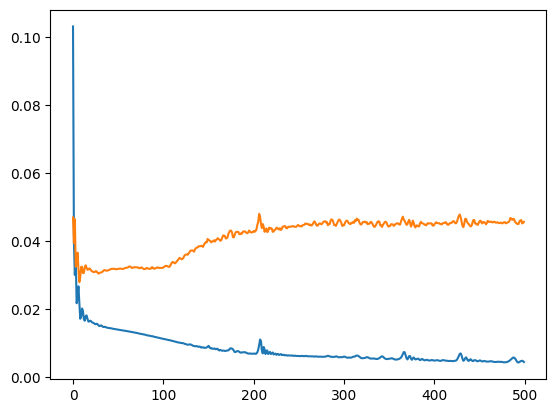

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
#Here loss on train and loss on test are not same . There is significant difference in both lossess.
#Which indicates there is overfitting in the model.

We understood that our model is overfitting to the black datapoints and it is very sensitive to black points. We want to decrese the overfitting of model and we wil do this with help of dropouts as follows.We will define the same model architecture as above architecture just we will add one dropout layer with ratio 0.2 which states that if there are 100 epochs , then for 80 epochs tha perticular node will be on and for 20 epochs that perticular node will be turned off.We have to define dropout layer on every hidden layer.

In [ ]:
#Defining an ANN
model = Sequential()
model.add(Dense(128,input_dim=1,activation="relu"))
model.add(Dropout(0.5)) #Here we are defining the dropout layer for 1st hidden layer
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.5))  #Here we are defining the dropout layer for 2nd hidden layer
model.add(Dense(1,activation = "linear"))

adam = Adam(learning_rate = 0.01)  #Using adam optimizer with learning rate of 0.01
model.compile(loss="mse",optimizer=adam,metrics=["mse"])
history = model.fit(x_train,y_train,epochs=500,validation_data=(x_test,y_test))

Epoch 1/500


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.1747 - mse: 0.1747 - val_loss: 0.0345 - val_mse: 0.0345
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.0338 - mse: 0.0338 - val_loss: 0.0534 - val_mse: 0.0534
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - loss: 0.0401 - mse: 0.0401 - val_loss: 0.0671 - val_mse: 0.0671
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.0811 - mse: 0.0811 - val_loss: 0.0398 - val_mse: 0.0398
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.0706 - mse: 0.0706 - val_loss: 0.0301 - val_mse: 0.0301
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 0.0352 - mse: 0.0352 - val_loss: 0.0433 - val_mse: 0.0433
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.0233 - mse: 0.0233 - val_loss: 0.0581 - val_mse: 0.0581
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 0.0691 - mse: 0.0691 - val_loss: 0.0611 - val_mse: 0.0611
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.0575 - mse: 0.0575 - v

In [ ]:
#Evaluating a model
train_mse = model.evaluate(x_train,y_train,verbose=0)
test_mse = model.evaluate(x_test,y_test,verbose=0)
print("Train MSE:",train_mse[1])
print("Test MSE:",test_mse)

Train MSE: 0.014482824131846428
Test MSE: [0.03774318844079971, 0.03774318844079971]


In [ ]:
y_pred=model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


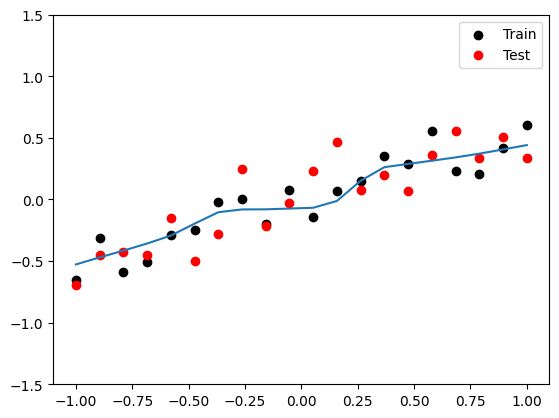

In [ ]:
plt.figure()
plt.scatter(x_train,y_train,c='black',label='Train')
plt.scatter(x_test,y_test,c='red',label='Test')
plt.plot(x_test,y_pred)
plt.legend()
plt.ylim((-1.5,1.5))
plt.show()
#After appling dropout layers,we can observe that the curve somewhat smoothened.
#Which indicates that model is not that much reactive to the perticular set of points
#rather it is trying to find the best features of the points of data.

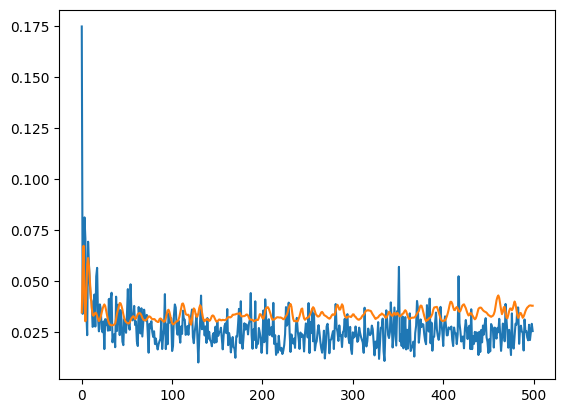

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
#The gap between training and validation loss has decrease.

**Impact of P(Dropout Ratio) on MOdel Architecture-**

Value of P ranges from 0 to 1. If value of P is lesser then there is overfitting in the model and if value of P is higher then there is underfitting in the model.So we should keep the value of P in between 0.2 to 0.5

**Practical Tips and Tricks:**

1)If overfitting is there in the model then increase the value of P and if there is underfitting in the model then decrease the value of P

2)Some of the better neural network architecture,dropout is applied at the last-layer.DOnt directly apply drpout on all the hidden layers rather apply dropout on last hidden layer and see the val_accuracy is increasing or not.

3)If u are working on CNN, then use P as 0.4 to 0.5 and if u are working on RNN then use P as 0.2 to 0.3 and if u are working on ANN then use P value as 0.1 to 0.5

**Drawbacks of Dropout Layers:**

1)There is delay in convergence(finding true value of weight and biases)

2) ANN architectures loss function changes because we dont use all the nodes in Dropout layer training and loss function considers all the nodes for calculating the loss function